# Model interpretability - Class exercise

In [34]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Tree Based - Classification

### Reading the data

In [35]:
data_cancer = load_breast_cancer()
print (data_cancer.DESCR)
df_cancer = pd.DataFrame(data_cancer.data, columns = data_cancer.feature_names)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [36]:
df_cancer['target'] = data_cancer.target

In [37]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Fitting a model

##### Split the data and fit a tree based classification model of your choice

In [38]:
X = df_cancer.loc[:,df_cancer.columns!='target']
y = df_cancer.target

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=1231)



In [39]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

### Evaluating the model

##### Evaluate the model you trained and also present the confusion matrix

The model's accuracy is : 0.9385964912280702
Confusion matrix:


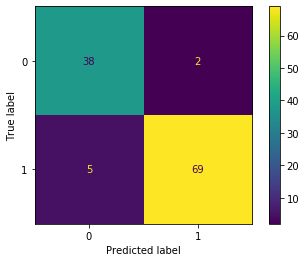

In [40]:
y_pred = clf.predict(X_test)
acc= clf.score(X_test,y_test)
print(f'The model\'s accuracy is : {acc}')

print('Confusion matrix:')
display(plot_confusion_matrix(clf, X_test,y_test))

### Plotting the feature importance

##### Extract and plot the feature importances

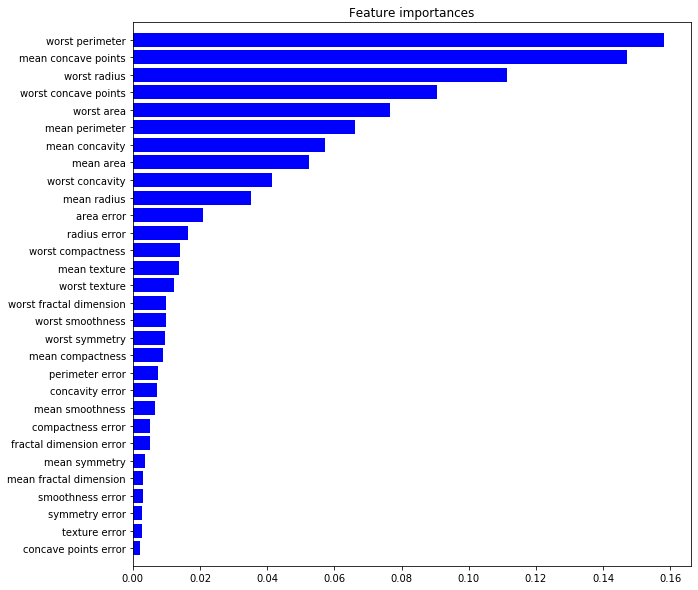

In [41]:
importance = clf.feature_importances_
indices = np.argsort(importance)
features = X_train.columns
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]),importance[indices], color ='b')
plt.yticks(range(X_train.shape[1]),[features[i] for i in indices])
plt.ylim(-1,X_train.shape[1])
plt.show()


## Tree based - Regression

### Reading the data

In [42]:
data_diab = load_diabetes()
print (data_diab.DESCR)
df_diab = pd.DataFrame(data_diab.data, columns = data_diab.feature_names)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [43]:
df_diab['target'] = data_diab.target
df_diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Fitting a model

##### Split the data and fit a tree based regression model of your choice

In [44]:
X = df_diab.loc[:,df_diab.columns!='target']
y = df_diab.target

X_train_d,X_test_d, y_train_d, y_test_d = train_test_split(X,y,test_size=.2, random_state=1231)


In [45]:
reg = RandomForestRegressor()
reg.fit(X_train_d,y_train_d)

RandomForestRegressor()

### Evaluating the model

##### Evaluate the model you trained and plot the distribution of the predictions vs. actual

No handles with labels found to put in legend.


The R2 score of the model is : 0.5417433019184446


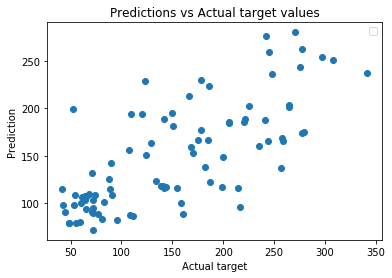

In [46]:
y_pred2 = reg.predict(X_test_d)

score = reg.score(X_test_d,y_test_d)

print(f'The R2 score of the model is : {score}')

plt.scatter(y_test_d,y_pred2)
plt.xlabel('Actual target')
plt.ylabel('Prediction')
plt.title('Predictions vs Actual target values')
plt.legend()
plt.show()

### Plotting the feature importances

##### Extract and plot the feature importances

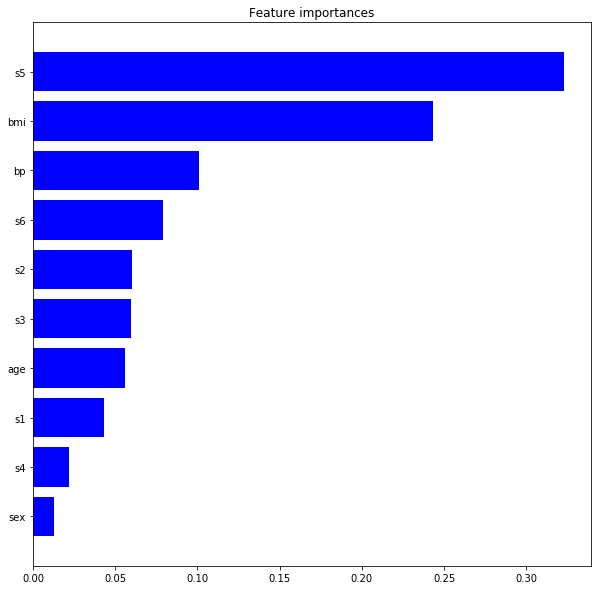

In [47]:


importance = reg.feature_importances_
indices = np.argsort(importance)
features = X_train_d.columns
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.barh(range(X_train_d.shape[1]),importance[indices], color ='b')
plt.yticks(range(X_train_d.shape[1]),[features[i] for i in indices])
plt.ylim(-1,X_train_d.shape[1])
plt.show()

## Linear models

**We will use the same datasets but with other models**

### Classification with Logistic Regression

#### Fitting a model

##### Fit a Logistic Regression model with the breast cancer data

In [48]:
clf = LogisticRegression()
clf.fit(X_train,y_train)


C:\Users\Daniel\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

#### Evaluating the model

##### Evaluate the model you trained and also present the confusion matrix

The accuracy score of the model is : 0.9473684210526315

Confusion matrix:


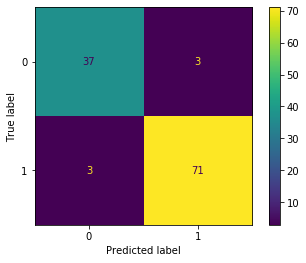

In [52]:
acc2 = clf.score(X_test,y_test)
print(f'The accuracy score of the model is : {acc2}')
print()
print('Confusion matrix:')
display(plot_confusion_matrix(clf,X_test,y_test))

#### Plotting the feature importance

##### Extract and plot the feature importances

In [58]:
FEATURES = X_train.columns.reshape(-1,1)
coef_df = pd.DataFrame(clf.coef_, index = FEATURES, 
                       columns = ['Coefficient']).sort_values(by = 'Coefficient')

AttributeError: 'Index' object has no attribute 'reshape'

In [53]:
importance = clf.feature_importances_
indices = np.argsort(importance)
features = X_train.columns
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]),importance[indices], color ='b')
plt.yticks(range(X_train.shape[1]),[features[i] for i in indices])
plt.ylim(-1,X_train.shape[1])
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

### Regression with Linear Regression

#### Fitting a model

##### Fit a Linear Regression model using the diabetes data

In [ ]:
# your mode here

#### Evaluating the model

##### Evaluate the model you trained and plot the distribution of the predictions vs. actual

In [ ]:
# your mode here

#### Plotting the feature importance

##### Extract and plot the feature importances

In [ ]:
# your code here